### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptaran consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)


# Tarea 1: Análisis de señales usando la FFT

Para esta tarea considere la señal adjunta guardada en el archivo `elefante_ruidoso.dat`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import fftpack
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal?  

- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta
 

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma

Describa y clasifique la señal según los comportamientos que observa

In [2]:
len(x)

2000

La señal cuenta con 2000 valores, donde cada valor fue tomado en una fracción de tiempo única. Por esta razón, la duración contemplada por la señal es de 2000 unidades de tiempo.

In [3]:
import scipy.fft as sfft

<IPython.core.display.Javascript object>


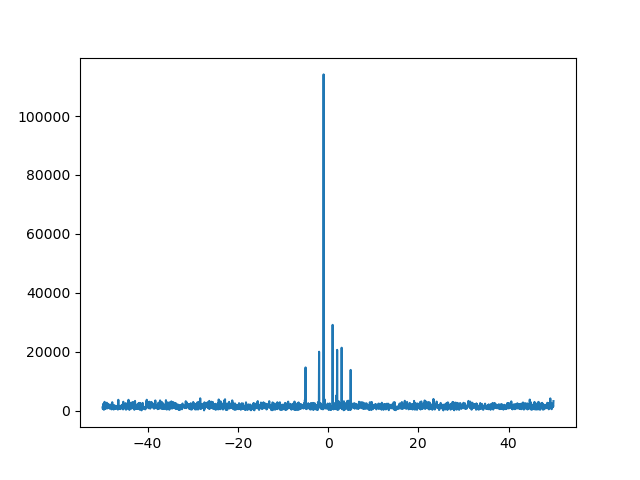

In [4]:
s = sfft.fft(x,len(x))
SA = np.absolute(s)
freqs = sfft.fftfreq(len(x), 1/100)
plt.figure()
plt.plot(sfft.fftshift(freqs), sfft.fftshift(SA))

A simple vista se puede apreciar que la señal presenta ruido (o piso en el gráfico).
   
   
Aplicamos Fourier para descomponer el arreglo (señal), de esta forma, podremos obtener su amplitud, angulo de fase y frecuencia.
Con una frecuencia de muestreo igual a 100, obtuvimos la frecuencia máxima y graficamos frecuencia vs amplitud. Vemos del gráfico que las frecuencias se agrupan en amplitudes específicas. En este caso, cuando la frecuencia es de -1 Hz, alcanza una amplitud altísima, por esto, concluimos que la frecuencia máxima es de -1 Hz.


Cabe mencionar que si cambia la frecuencia muestral, también lo hará la frecuencia máxima. 

In [5]:
def plotGraph(x):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4))
    p_real = np.real(x)
    p_imag = np.imag(x)
    ax1.title.set_text('Parte real vs t')
    ax2.title.set_text('Parte imaginaria vs t')
    ax3.title.set_text('Nube de puntos')
    ax1.plot(p_real)
    ax2.plot(p_imag)
    ax3.scatter(p_imag,p_real, s=0.3)
    


<IPython.core.display.Javascript object>


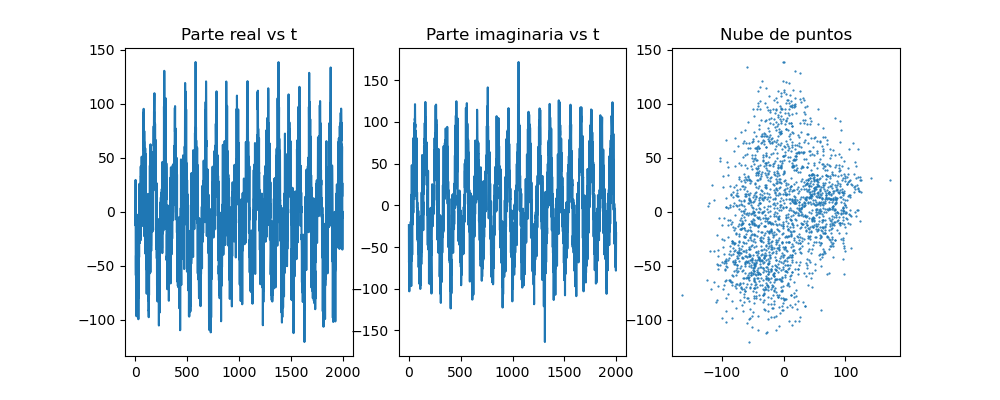

In [6]:
plotGraph(x)

Los gráficos, "parte real vs t" y "parte imaginaria vs t" a simple vista se ven continuas, sin embargo, y debido a su naturaleza, son discretas y cuantizadas.   
    
    
En los gráficos es posible evidenciar que las muestras presentan un comportamiento errático, sin embargo, se logra apreciar a simple vista una suerte de patrón oscilante. Pese a esto, la nube de puntos esboza una figura poco clara y sin coherencia.  
Claramente no se ve un elefantito :( 

## Pregunta 2: Análisis de Fourier (40%)

- Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 
- Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa
- Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores
- Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud


Función que recibe la señal s y retorna el espectro de amplitud, espectro de fase y frecuencias asociadas

In [7]:
import scipy.fft as sfft

def F(s):
    Fs = 40 #Usaremos una frecuencia de muestreo igual a 40
    S = sfft.fft(s,len(s)) #aplicamos fourier al arreglo de complejos
    SA = np.absolute(S)   #Obtenemos el espectro de amplitud
    SP = np.angle(S) #Obtenemos el espectro de fase
    freqs = sfft.fftfreq(len(S),1/Fs) #Y la frecuencia
    return SA, SP, freqs



In [8]:
SA, SP, freqs = F(x)

<IPython.core.display.Javascript object>


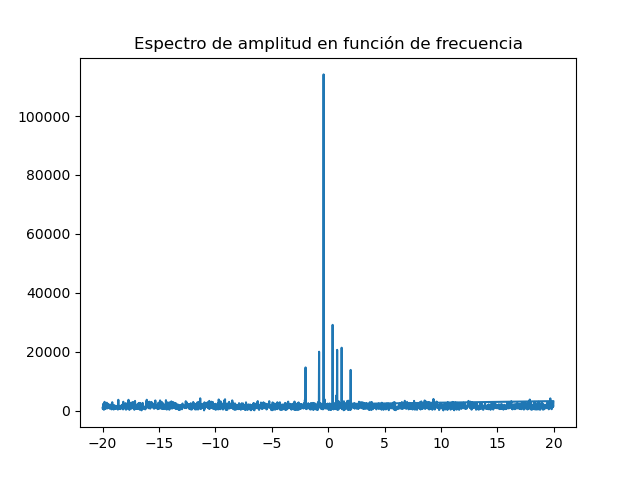

In [9]:
plt.figure()
plt.title("Espectro de amplitud en función de frecuencia")
plt.plot(freqs,SA)

En primera instancia, se puede apreciar que el gráfico presenta las amplitudes que alcanza la señal entre los rangos de frecuencias que van desde los [-20, 20] Hz. También se puede apreciar un valor que sobresale del resto, esta es su amplitud más alta. Es posible ver que el ruido se concentra entre las amplitudes [0,4000] unidades de amplitud.

<IPython.core.display.Javascript object>


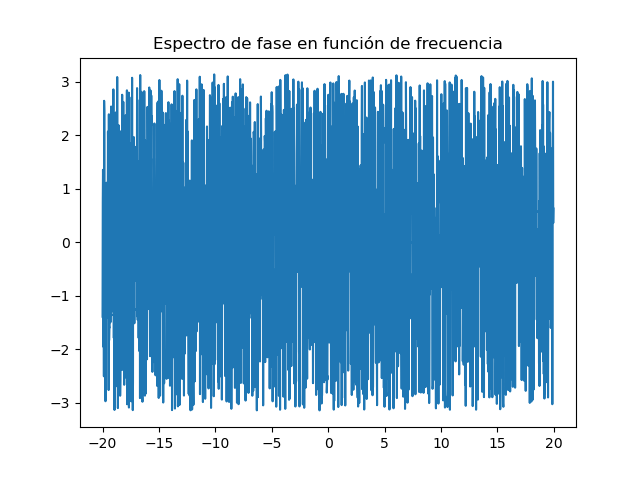

In [10]:
plt.figure()
plt.title("Espectro de fase en función de frecuencia")
plt.plot(freqs,SP)

El gráfico presenta el ángulo que toma cada una de las componentes frecuenciales entre un rango de [- $\pi$ , $\pi$].   
No puede visualizarse cierta periodicidad, por esta razón intuimos que a medida que cambia la frecuencia, el ángulo de fase cambia drásticamente.

In [11]:
def modifiedSpectrum(SA,M):
    MS = SA.copy()
    j = np.argsort(MS)
    ind = np.argsort(MS)[-M:]
    for i in j:
        if i not in ind:
            MS[i] = 0
    ind = np.flip(ind)
    return MS, ind


<IPython.core.display.Javascript object>


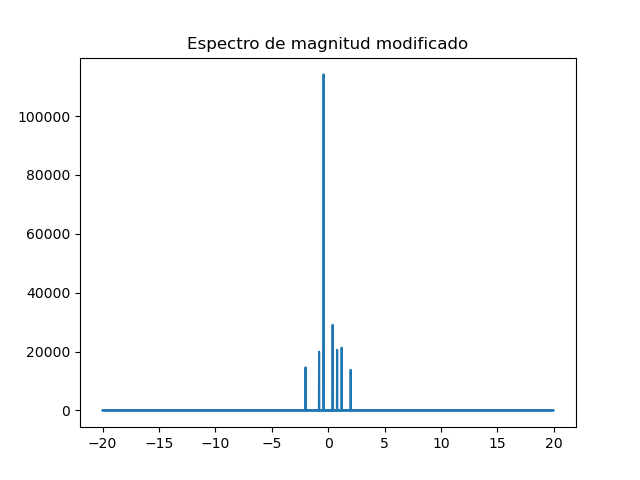

In [12]:
# Espectro modificado para M = 7
ms, ind = modifiedSpectrum(SA,7) 

plt.figure()
plt.title("Espectro de magnitud modificado")
plt.plot(freqs,ms)



Del gráfico es posible evidenciar que el ruido ha disminuido casi en su totalidad

In [13]:
# Indices ordenados descendentemente en función de su amplitud
print("indices", ind, "\n")

# Frecuencias asociadas a los M valores
print("Frecuencias ",freqs[ind],"\n")

# Amplitudes asociadas a los M valores
print("Amplitudes ",SA[ind],"\n")

# Fases asociadas a los M valores
print("Fases ",SP[ind],"\n")


indices [1980   20   60   40 1960 1900  100] 

Frecuencias  [-0.4  0.4  1.2  0.8 -0.8 -2.   2. ] 

Amplitudes  [114172.07496405  29095.71108497  21326.97306033  20598.95161544
  19964.34184966  14630.20281002  13788.41460493] 

Fases  [-1.29886946 -2.82861611 -3.03996873  1.13605401 -1.99649896  0.10721682
  0.0412039 ] 



## Pregunta 3: Reconstrucción (40%)

Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase. 

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal reconstruida en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria en función de la parte real de la señal reconstruida


Describa y comente lo que observa, en particular compare cada resultado con el caso `M=len(x)` (caso original) y discuta sobre lo que ocurre para $M>7$, $M=7$ y $M<7$ con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido? 

In [14]:
def reConst(ind, SM, SP):
    C_array = []
    for i in range (0,len(SM)):
        C_array.append(SM[i]*np.exp(1j*SP[i]))
    res = scipy.fft.ifft(C_array)
    return res

Para M =  2000


<IPython.core.display.Javascript object>


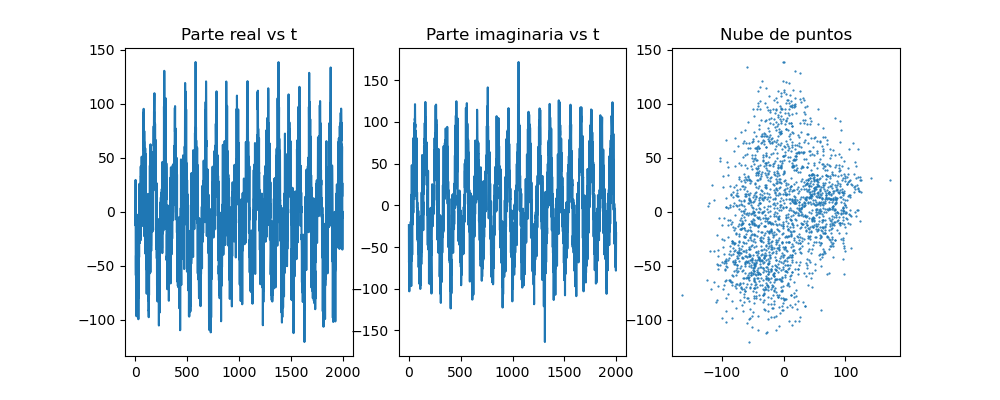

Para M =  100


<IPython.core.display.Javascript object>


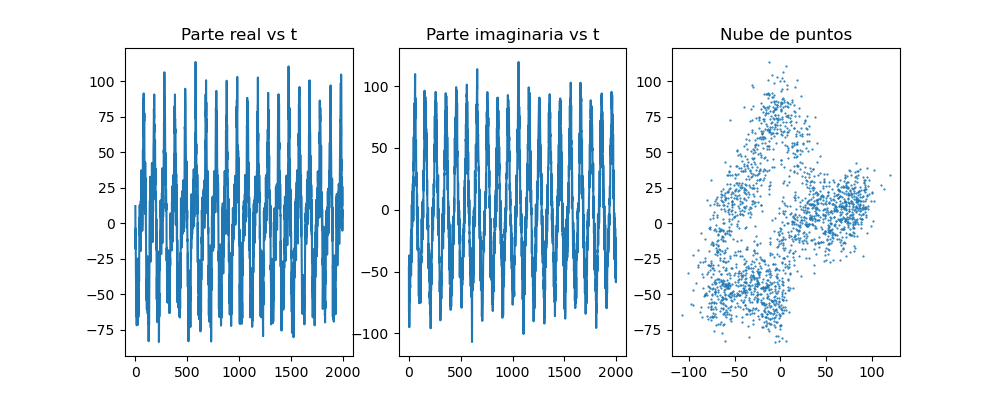

Para M =  10


<IPython.core.display.Javascript object>


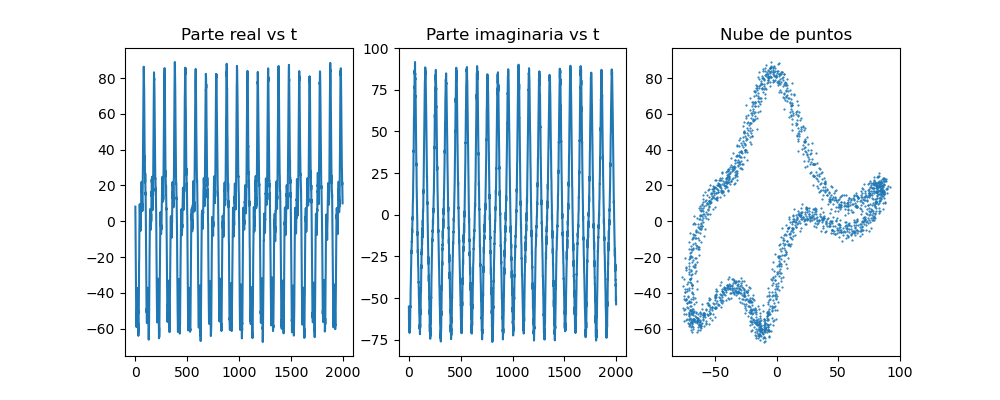

Para M =  7


<IPython.core.display.Javascript object>


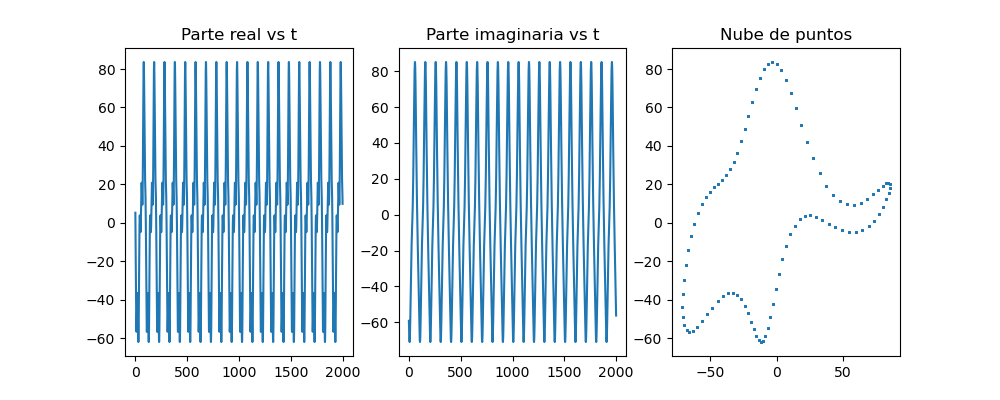

Para M =  5


<IPython.core.display.Javascript object>


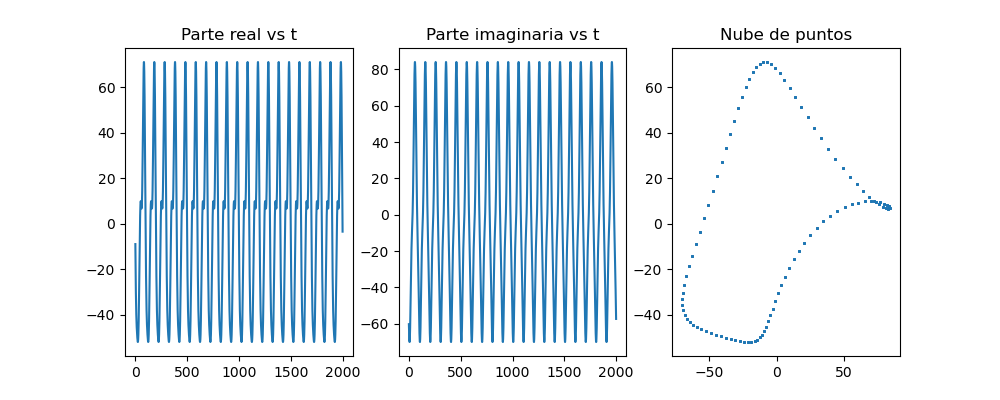

Para M =  3


<IPython.core.display.Javascript object>


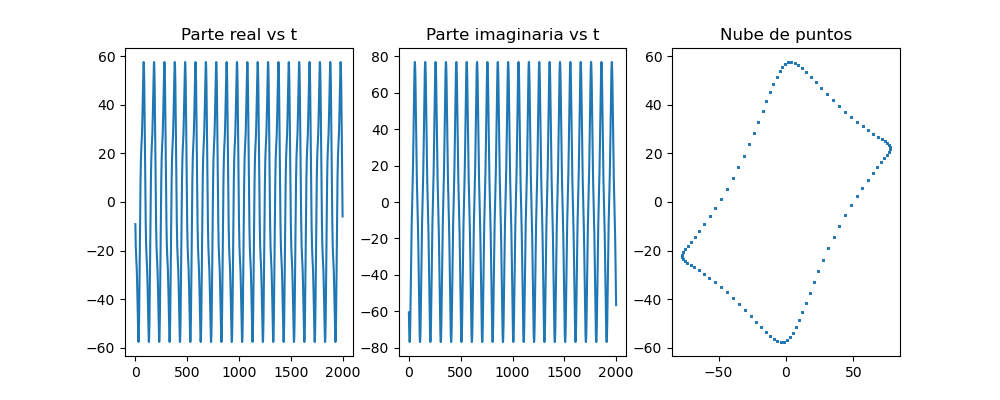

Para M =  1


<IPython.core.display.Javascript object>


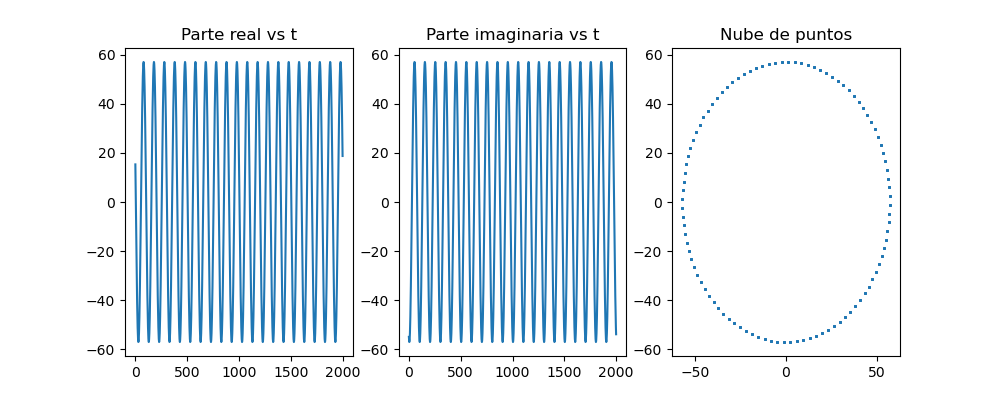

In [15]:
M = [2000,100, 10, 7, 5, 3, 1]
for j in M:
    magn, indices = modifiedSpectrum(SA,j)
    clean = reConst(indices, magn, SP)
    print("Para M = ", j)
    plotGraph(clean)


La transformada de Fourier es una herramienta que nos permite limpiar datos con ruido, gracias a que descompone señales en sus partes elementales.   
En este caso, primero aplicamos la transformada de fourier a un arreglo de largo 2000, donde cada uno de sus elementos son números complejos. Así, descompusimos el arreglo para obtener su amplitud y ángulo de fase.   
Pudimos darnos cuenta al analizar su amplitud que los datos tenían ruido, por lo que conservamos los datos cuya amplitud era mayor, y al resto le dimos amplitud cero. De esta forma, al aplicar la transformada de fourier inversa, volvimos a obtener un arreglo de números complejos, sólo que esta vez sin datos que ensucien nuestro elefante.   
Cuando M toma valores grandes, por ejemplo 2000, podemos ver que no se filtran datos.
Cuando M toma valores pequeños, por ejemplo 1, podemos ver que se filtran prácticamente todas nuestras amplitudes, quedando así un círculo gracias al cos.   
Cuando M = 7, intuimos que la figura se muestra tal y como es porque seguramente es el punto óptimo para filtrar los datos en este caso puntual.

## Indicaciones

- Puede usar las funciones `np.real` e `np.imag` para obtener la parte real e imaginaria de un número complejo, respectivamente
- Si `x` y `y` son la parte real e imaginaria de un número complejo, puedes reconstruir el número complejo con `c = x + 1j*y`
- Si `rho` y `phi` son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando `c = rho*np.exp(1j*phi)`
- Recuerden que un slice de un `ndarray` no es una copia sino una referencia. Para crear copias use el atributo `.copy()`
- Usa `scipy.fft.fft` y `scipy.fft.ifft` para calcular la FFT directa e inversa, respectivamente

## Éxito!

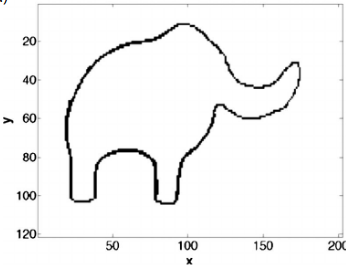